In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime as dt

In [10]:
ca_df = pd.read_csv("Resources/Cleaned Weather Data/CAMachineLCleaned.csv")
fl_df = pd.read_csv("Resources/Cleaned Weather Data/FLMachineLCleaned.csv")
il_df = pd.read_csv("Resources/Cleaned Weather Data/ILMachineLCleaned.csv")

In [18]:
ca_weather = ca_df.groupby("year").mean()
il_weather = il_df.groupby("year").mean()
fl_weather = fl_df.groupby("year").mean()

In [12]:
# # Converting to Datetime
# ca_weather_cleaned = ca_weather.copy()
# ca_weather_cleaned["Date"] = pd.to_datetime(ca_weather_cleaned["Date"],format="%Y-%m-%d")
# ca_weather_cleaned = ca_weather_cleaned.set_index(ca_weather_cleaned["Date"])
# fl_weather_cleaned = fl_weather.copy()
# fl_weather_cleaned["Date"] = pd.to_datetime(fl_weather_cleaned["Date"], format="%Y-%m-%d")
# fl_weather_cleaned = fl_weather_cleaned.set_index(fl_weather_cleaned["Date"])
# il_weather_cleaned = il_weather.copy()
# il_weather_cleaned["Date"] = pd.to_datetime(il_weather_cleaned["Date"], format="%Y-%m-%d")
# il_weather_cleaned = il_weather_cleaned.set_index(il_weather_cleaned["Date"])

# ca_weather_cleaned

# # Converting to Datetime (using weather and hpi data)
# ca_weather_cleaned = ca_weather.copy()
# ca_weather_cleaned["Year"] = pd.to_datetime(ca_weather_cleaned["Year"],format="%Y")
# ca_weather_cleaned["HPI"] = ca_weather_cleaned["HPI"].astype(int)
# ca_weather_cleaned["Average Temperature (F)"] = ca_weather_cleaned["Average Temperature (F)"].astype(int)
# ca_weather_cleaned = ca_weather_cleaned.set_index(ca_weather_cleaned["Year"])
# fl_weather_cleaned = fl_weather.copy()
# fl_weather_cleaned["Year"] = pd.to_datetime(fl_weather_cleaned["Year"],format="%Y")
# fl_weather_cleaned["HPI"] = fl_weather_cleaned["HPI"].astype(int)
# fl_weather_cleaned["Average Temperature (F)"] = fl_weather_cleaned["Average Temperature (F)"].astype(int)
# fl_weather_cleaned = fl_weather_cleaned.set_index(fl_weather_cleaned["Year"])
# il_weather_cleaned = il_weather.copy()
# il_weather_cleaned["Year"] = pd.to_datetime(il_weather_cleaned["Year"],format="%Y")
# il_weather_cleaned["HPI"] = il_weather_cleaned["HPI"].astype(int)
# il_weather_cleaned["Average Temperature (F)"] = il_weather_cleaned["Average Temperature (F)"].astype(int)
# il_weather_cleaned = il_weather_cleaned.set_index(il_weather_cleaned["Year"])


# ca_weather_cleaned.dtypes

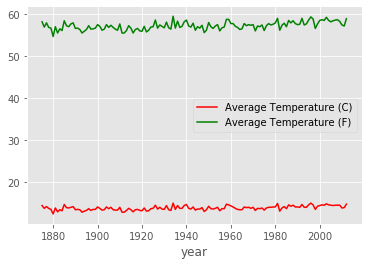

In [20]:
register_matplotlib_converters()
plt.style.use("ggplot")

ca_weather.plot(color=["Red", "Green"])

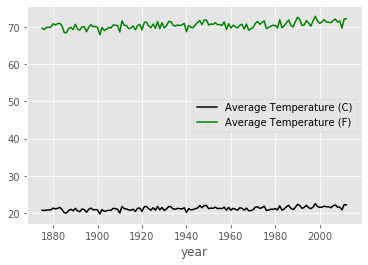

In [21]:
register_matplotlib_converters()
plt.style.use("ggplot")

fl_weather.plot(color=["black", "green"])

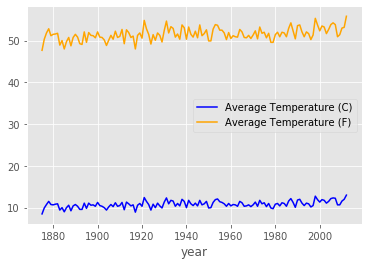

In [22]:
register_matplotlib_converters()
plt.style.use("ggplot")

il_weather.plot(color = ["blue", "orange"])

In [44]:
# ca_weather_cleaned = ca_weather_cleaned.loc['1990-01-01':'2013-09-01']
# ca_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="purple")

In [45]:
# il_weather_cleaned = il_weather_cleaned.loc['1990-01-01':'2013-09-01']
# il_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="red")

In [46]:
# fl_weather_cleaned = fl_weather_cleaned.loc['1990-01-01':'2013-09-01']
# fl_weather_cleaned.plot(x="Date", y="Average Temperature (F)", color="green")

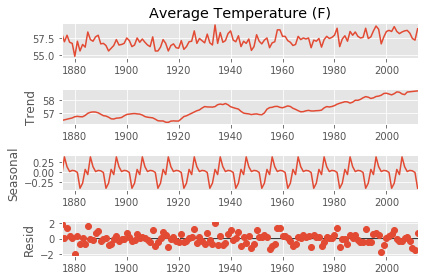

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ca_weather["Average Temperature (F)"], model='additive', extrapolate_trend='freq', period=10)
fig = result.plot()

In [102]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = ca_weather.rename(columns={"Average Temperature (C)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for California 1875-2113


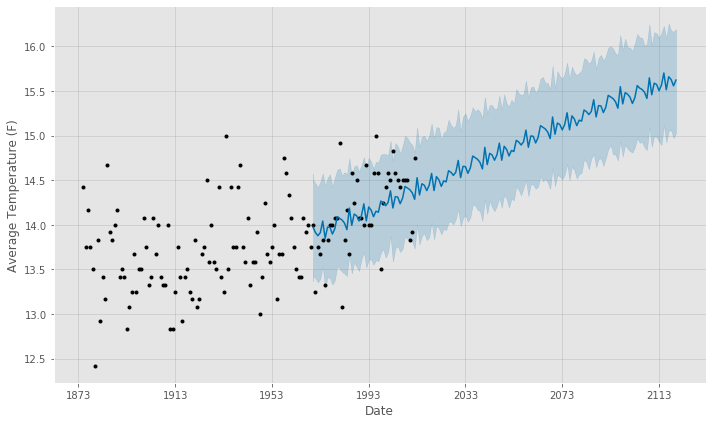

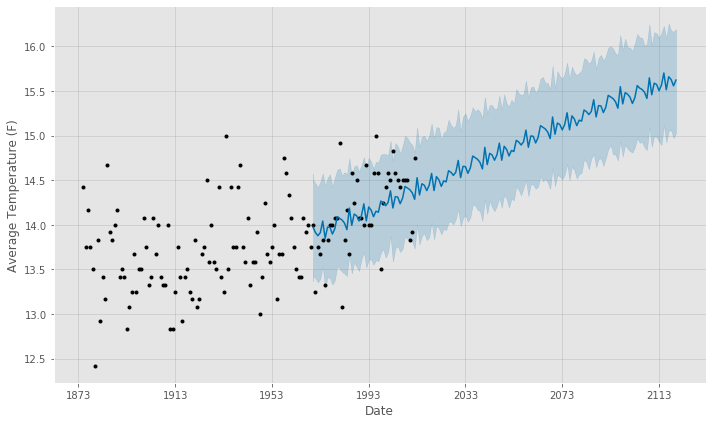

In [103]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 30 years
future = model.make_future_dataframe(150, freq= 'Y', include_history=True)
forecast = model.predict(future)
ca_predict = forecast[["ds", "yhat"]]

print("Average Temperature vs. Date Forecast for California 1875-2113")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")

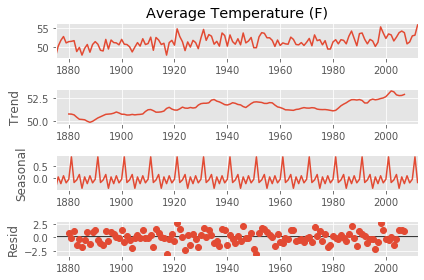

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(il_weather["Average Temperature (F)"], period = 10)
fig = result.plot()

In [61]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = il_weather.rename(columns={"Average Temperature (F)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for Illinois 1875-2119


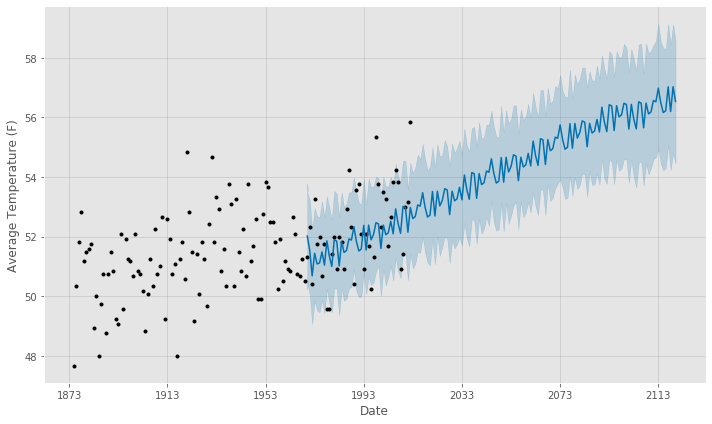

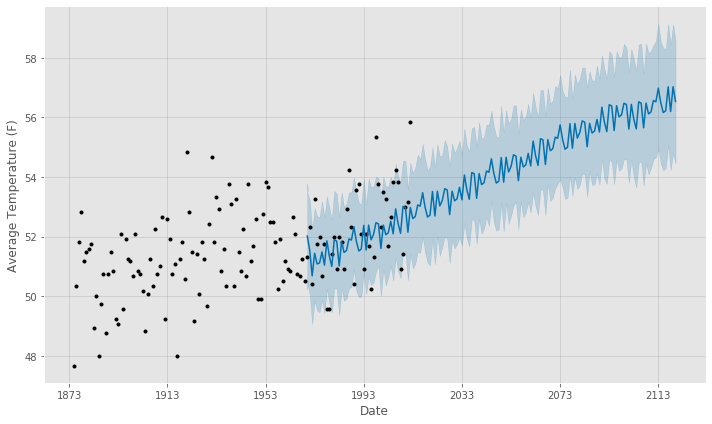

In [63]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 150 year
future = model.make_future_dataframe(150, freq= 'Y', include_history=True)
forecast = model.predict(future)
il_predict = forecast[["ds", "yhat"]]

print("Average Temperature vs. Date Forecast for Illinois 1875-2119")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")

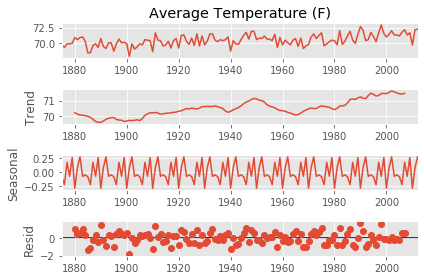

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(fl_weather["Average Temperature (F)"], period = 10)
fig = result.plot()

In [66]:
from fbprophet import Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
train_df = fl_weather.rename(columns={"Average Temperature (F)": "y"})
train_df["ds"] = train_df.index
model.fit(train_df)

Average Temperature vs. Date Forecast for Florida 1875-2113


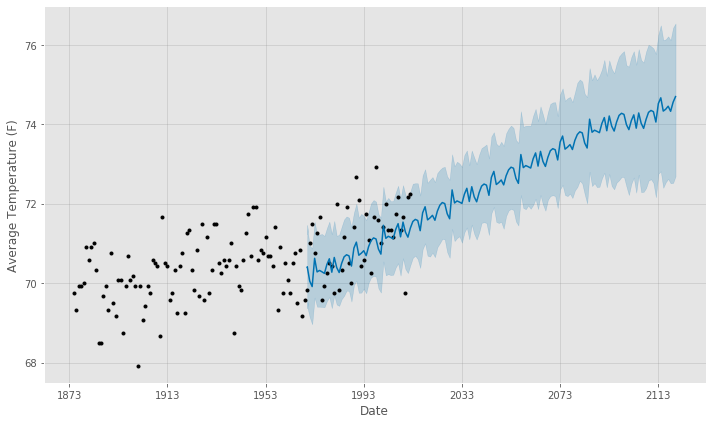

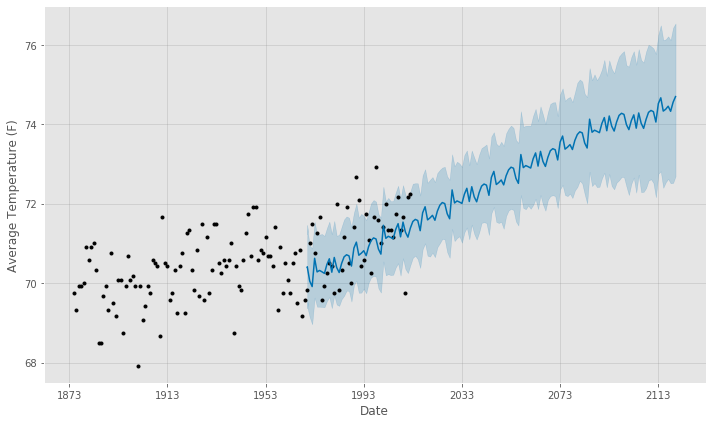

In [69]:
pd.plotting.register_matplotlib_converters()

# We want to forecast over the next 150 years
future = model.make_future_dataframe(150, freq= 'Y', include_history=True)
forecast = model.predict(future)
fl_predict = forecast[["ds", "yhat"]]

print("Average Temperature vs. Date Forecast for Florida 1875-2113")
model.plot(forecast, uncertainty=True, plot_cap=True, xlabel="Date", ylabel="Average Temperature (F)")

In [99]:
ca_predict["State"] = "California"
il_predict["State"] = "Illinois"
fl_predict["State"] = "Florida"

ca_df = ca_predict.loc[ca_predict["ds"] > "1995-12-31 00:00:00.000002012"].copy()
il_df = il_predict.loc[il_predict["ds"] > "1995-12-31 00:00:00.000002012"].copy()
fl_df = fl_predict.loc[fl_predict["ds"] > "1995-12-31 00:00:00.000002012"].copy()
ca_df

C:\Users\cbere\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,yhat,State
164,1996-12-31 00:00:00.000002012,58.026152,California
165,1997-12-31 00:00:00.000002012,58.236920,California
166,1998-12-31 00:00:00.000002012,58.122479,California
167,1999-12-31 00:00:00.000002012,58.100723,California
168,2000-12-31 00:00:00.000002012,58.165753,California
...,...,...,...
283,2115-12-31 00:00:00.000002012,61.245636,California
284,2116-12-31 00:00:00.000002012,61.363114,California
285,2117-12-31 00:00:00.000002012,61.345435,California
286,2118-12-31 00:00:00.000002012,61.197711,California


In [105]:
frames = [ca_df, fl_df, il_df]

states_predict = pd.concat(frames)

states_predict["ds"] = pd.to_datetime(states_predict["ds"], format="%Y-%m-%d")
states_predict["year"] = states_predict["ds"].dt.strftime("%Y").astype(int)

states_predict = states_predict[["yhat", "State", "year"]]

states_predict = states_predict.rename(columns={"yhat": "Average Weather (F, Predicted)"})
states_predict

,"Average Weather (F, Predicted)",State,year
164,58.026152,California,1996
165,58.236920,California,1997
166,58.122479,California,1998
167,58.100723,California,1999
168,58.165753,California,2000
...,...,...,...
283,56.222767,Illinois,2115
284,57.025033,Illinois,2116
285,56.197010,Illinois,2117
286,57.027116,Illinois,2118


In [106]:
states_predict.to_csv("Resources/StateWeatherByYearPredicted.csv")